<a href="https://colab.research.google.com/github/intimanjunath/Neural-network-using-numpy-keras-pytorch-and-jax/blob/main/7_tensorflow_builtin_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

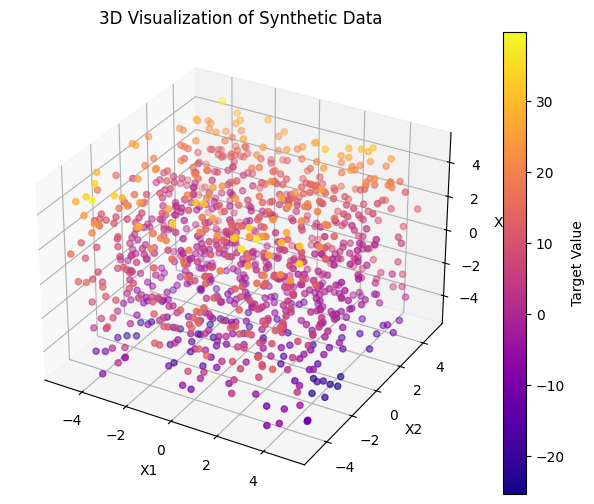

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

def generate_data(n_samples=1000):
    # Generate three features uniformly between -5 and 5
    x1 = np.random.uniform(-5, 5, n_samples)
    x2 = np.random.uniform(-5, 5, n_samples)
    x3 = np.random.uniform(-5, 5, n_samples)

    # Define a non-linear function with noise:
    # Example: 1.5*sin(x1) + 0.6*x2^2 + 0.2*x3^3 + cos(x1*x2) + Gaussian noise
    noise = np.random.normal(0, 0.3, n_samples)
    y = 1.5 * np.sin(x1) + 0.6 * (x2**2) + 0.2 * (x3**3) + np.cos(x1*x2) + noise

    # Stack features together
    X = np.column_stack((x1, x2, x3))
    return X.astype(np.float32), y.astype(np.float32)

# Generate synthetic data
X, y = generate_data(1000)

# Plot the data in a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.colorbar(sc, label='Target Value')
plt.title("3D Visualization of Synthetic Data")
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build the Model Using Built-in Keras Layers

Sequential model using tf.keras built‑in layers. This network has three layers: two hidden layers with ReLU activations and one output layer (for regression).

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model using built-in layers
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(3,)),  # Hidden layer 1
    layers.Dense(16, activation='relu'),                    # Hidden layer 2
    layers.Dense(1)                                         # Output layer (linear activation)
])

# Compile the model with an optimizer and loss function for regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 161.3147 - mae: 9.7390 - val_loss: 131.5127 - val_mae: 8.8034
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 153.0166 - mae: 9.5568 - val_loss: 120.6053 - val_mae: 8.3786
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 137.3795 - mae: 8.9141 - val_loss: 109.0891 - val_mae: 7.9055
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 130.0973 - mae: 8.5122 - val_loss: 95.2864 - val_mae: 7.3006
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 115.4694 - mae: 8.1605 - val_loss: 78.2549 - val_mae: 6.5482
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 98.7843 - mae: 7.5904 - val_loss: 58.6639 - val_mae: 5.6599
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 65.7568 - mae: 6.1424 - val_loss: 42.6813 - val_mae: 4.8533
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 50.7908 - mae: 5.3753 - val_loss: 32.6642 - val_mae: 4.3348
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 

In [5]:
# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions on test data
y_pred = model.predict(X_test)

# Display first 5 predictions vs actual
print("\nFirst 5 Test Predictions vs Actual:")
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.3f}, Actual: {y_test[i]:.3f}")

Test Loss (MSE): 3.7787, Test MAE: 1.5516
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

First 5 Test Predictions vs Actual:
Predicted: -16.016, Actual: -20.941
Predicted: 25.272, Actual: 26.270
Predicted: 3.928, Actual: 2.941
Predicted: 18.746, Actual: 17.556
Predicted: 8.251, Actual: 9.791


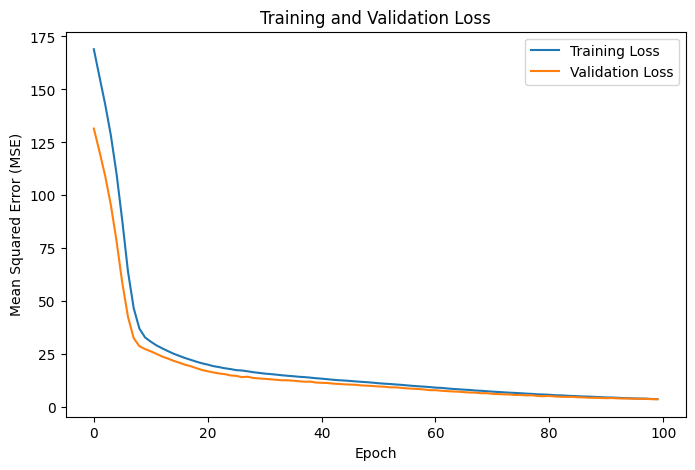

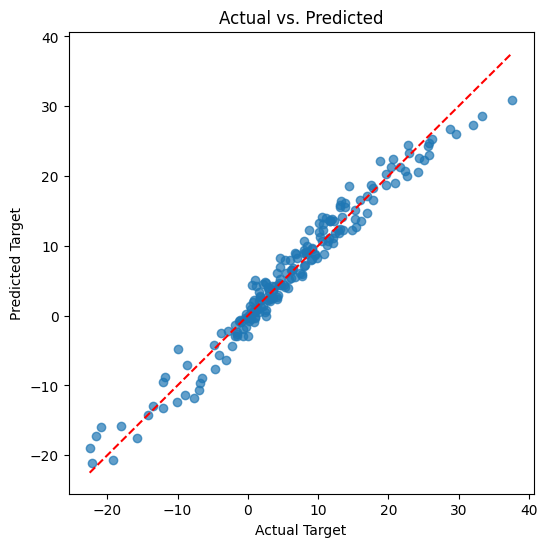

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Plot Actual vs. Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title("Actual vs. Predicted")
plt.show()